In [29]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from pathlib import Path
from us import states

In [49]:
vacc_csv = Path("C:/Users/cmfjr/PROJECT1/project-1/us_state_vaccinations.csv")
vacc_df = pd.read_csv(vacc_csv)

vacc_df["date"] = pd.to_datetime(vacc_df["date"])
only_2021 = vacc_df[vacc_df["date"].dt.year == 2021]
clean_vacc_2021_df = only_2021.dropna()

In [50]:
death_rates = Path("C:/Users/cmfjr/PROJECT1/project-1/death_rates_per_state.csv")
death_rates_df = pd.read_csv(death_rates)

# define a function to replace state abbreviations with full names
def replace_state_abbr(state_abbr):
    return states.lookup(state_abbr).name

# apply the function to the 'state' column and create a new column with the full names
death_rates_df['STATE'] = death_rates_df['STATE'].apply(lambda x: replace_state_abbr(x))
death_rates_2021_df = death_rates_df[death_rates_df["YEAR"] == 2021]
death_rates_2020_df = death_rates_df[death_rates_df["YEAR"] == 2020]

In [51]:
max_date_rows = clean_vacc_2021_df.groupby("location")["date"].idxmax()
result_df = clean_vacc_2021_df.loc[max_date_rows]
result_df


state_names = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York State", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
us_states_2021_df = result_df[result_df["location"].isin(state_names)]
us_states_2021_df = us_states_2021_df.rename(columns={'location': 'STATE'})
us_states_2021_df

,date,STATE,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
352,2021-12-30,Alabama,5624234.0,8051430.0,2868764.0,47.63,114.71,2335344.0,58.51,164.21,15999.0,10702.0,2183.0,0.699,574981.0,11.73
1187,2021-12-30,Alaska,1024695.0,1320615.0,475688.0,56.33,140.07,412110.0,65.03,180.52,1992.0,1365.0,1866.0,0.776,173822.0,23.76
2857,2021-12-30,Arizona,10491351.0,12612060.0,4898570.0,57.01,144.14,4149298.0,67.30,173.27,33341.0,22087.0,3034.0,0.832,1759019.0,24.17
3692,2021-12-30,Arkansas,3800076.0,4990280.0,1892791.0,51.21,125.92,1545513.0,62.72,165.36,9006.0,6495.0,2152.0,0.761,470125.0,15.58
5340,2021-12-08,California,61422331.0,72187615.0,31591741.0,64.22,155.45,25376295.0,79.95,182.70,222459.0,236319.0,5981.0,0.851,6460507.0,16.35
6197,2021-12-30,Colorado,9517277.0,10855185.0,4293859.0,66.22,165.27,3813580.0,74.56,188.50,33058.0,20359.0,3535.0,0.877,1708423.0,29.67
7032,2021-12-30,Connecticut,6638228.0,7423855.0,3159344.0,74.60,186.19,2659830.0,88.61,208.23,24164.0,15547.0,4361.0,0.894,1041981.0,29.23
7867,2021-12-30,Delaware,1582493.0,1975605.0,746478.0,64.16,162.51,624808.0,76.66,202.88,4398.0,2574.0,2643.0,0.801,265673.0,27.28
11207,2021-12-30,Florida,33644593.0,40667685.0,16001140.0,63.36,156.65,13607439.0,74.50,189.35,99267.0,67372.0,3137.0,0.827,5337198.0,24.85
12042,2021-12-30,Georgia,13331712.0,18331285.0,6505193.0,51.08,125.56,5423280.0,61.27,172.65,39266.0,36672.0,3454.0,0.727,1704373.0,16.05


Text(0, 0.5, 'COVID Death Rate (per 100,000 people)')

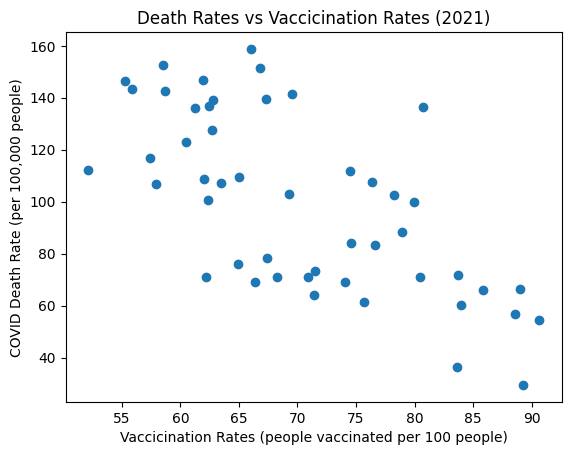

In [52]:
merged_df = pd.merge(us_states_2021_df, death_rates_2021_df, on='STATE')
vax_per_hundred = merged_df['people_vaccinated_per_hundred']
rate = merged_df['RATE']
plt.scatter(vax_per_hundred,rate)
plt.title('Death Rates vs Vaccicination Rates (2021)')
plt.xlabel('Vaccicination Rates (people vaccinated per 100 people)')
plt.ylabel('COVID Death Rate (per 100,000 people)')